# Simulación del Modelo de Ising con la dinámica de Kawasaki

---

**Javier Molina Motta**
**Ejercicio voluntario**

---

## Índice 
- [Introducción](#introducción)
- [Magnetización](#magnetizacion)
    - [Magnetización superior](#magnetización-superior)
    - [Magnetización inferior](#magnetizacon-inferior)
- [Densidad promedio](#densidad-promedio)
- [Energía media](#energia-media)


## Introducción

El modelo de Ising, planteado originalmente en 1924 como una herramienta para estudiar transiciones de fase en materiales ferromagnéticos, considera un sistema de espines que pueden tomar solo dos valores (+1 o -1) en una red regular. En este trabajo se estudia una variante del mismo, el modelo de Kawasaki, también conocido como modelo de Ising con parámetro de orden conservado (COP Ising), en el cual se mantiene constante la magnetización total (o número total de partículas con spin +1).

En lugar de tratar el sistema como un material magnético clásico, se propone una interpretación alternativa en la que el modelo describe un gas reticulado, donde cada celda puede estar ocupada o vacía. Esta equivalencia permite definir una densidad de partículas ρ constante a lo largo del sistema. A partir de esta descripción, se deriva un Hamiltoniano que incluye interacciones entre partículas vecinas con una energía de acoplamiento \( \epsilon \), siendo finalmente reescrito en función de los espines y de constantes como \( J = \epsilon/4 \) y el número de vecinos \( z \).

Una pieza fundamental de este enfoque es el uso del resultado exacto obtenido por Onsager en 1944 para el modelo de Ising bidimensional, que predice una transición de fase en función de la temperatura y la densidad. La expresión teórica de la magnetización en equilibrio muestra cómo esta se anula al alcanzar una temperatura crítica \( T_c \), lo cual justifica la simulación para distintos valores de \( \rho \) y \( T \).

Para llevar a cabo la simulación del sistema, se emplea el algoritmo de Metropolis, diseñado para muestrear configuraciones de un sistema en equilibrio térmico. Este algoritmo basa su funcionamiento en la propuesta de nuevas configuraciones mediante pasos aleatorios, aceptando o rechazando dichos cambios con una probabilidad que depende del cambio energético producido. En este modelo, la dinámica se implementa intercambiando pares de espines vecinos, de forma que se mantenga constante la magnetización global del sistema.

La conservación de espines junto con la condición de equilibrio térmico garantiza que las fluctuaciones de energía sean pequeñas, lo que resulta en una evolución más realista del sistema. Además, se emplean condiciones de contorno periódicas en el plano, junto con una modificación en las filas extremas para inducir un sesgo en el comportamiento del sistema que ayuda a detectar visualmente la transición de fase.

Con este planteamiento, se espera observar la separación de fases a temperaturas bajas y la homogeneización del sistema al superar la temperatura crítica, de acuerdo con las predicciones teóricas. El estudio se centra, por tanto, en la validación de esta transición mediante el análisis de observables como la magnetización local, la densidad de partículas en función de la posición, el calor específico y la susceptibilidad magnética.

## Magnetización
Dado que la magnetización neta total del sistema se ha impuesto a cero, se calcula la magnetización por separado para la mitad superior y la mitad inferior de la red. En cada mitad, se suman los valores de los espines (+1 o -1) y se toma el valor absoluto de la suma dividido entre el número de espines de esa región, obteniendo así la magnetización promedio por espín.

Este cálculo se implementa en las funciones `mag_sup` y `mag_inf`. Durante la simulación, los valores se almacenan cada 100 pasos Monte Carlo para estudiar su evolución, así como para calcular promedios y desviaciones estándar.

### Magnetización superior

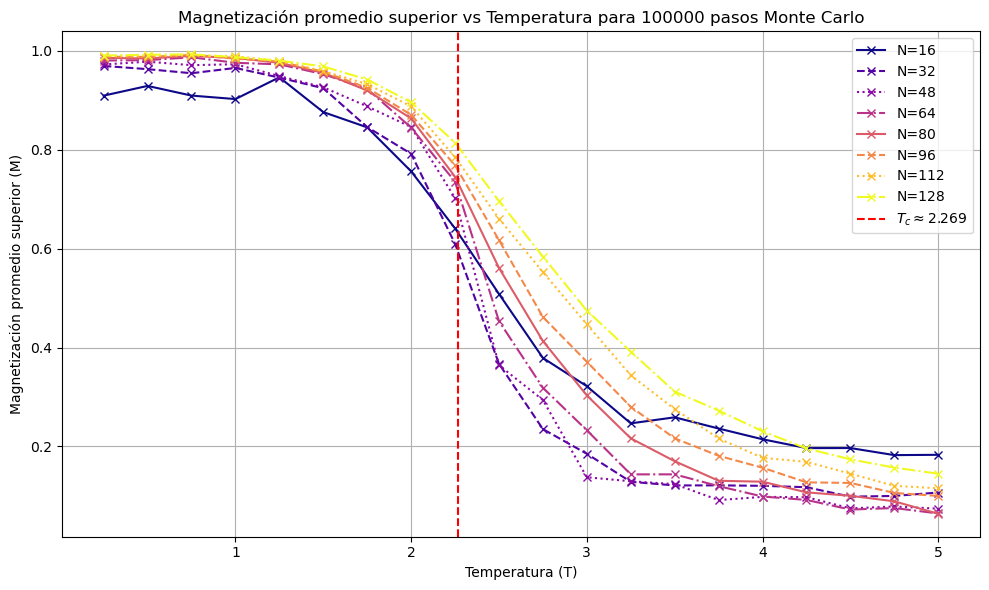

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

valores_N = [16, 32, 48, 64, 80, 96, 112, 128]
colores = plt.cm.plasma(np.linspace(0, 1, len(valores_N)))
estilos = ['-', '--', ':', '-.']

plt.figure(figsize=(10, 6))

for i, N in enumerate(valores_N):
    archivo = f'archivos/promedio_magnetizacionsuperior{N}.txt'
    if os.path.exists(archivo):
        datos = np.loadtxt(archivo)
        T = datos[:, 1]
        M = datos[:, 0]
        plt.plot(T, M, linestyle=estilos[i % len(estilos)], color=colores[i], marker='x', label=f'N={N}')
    else:
        print(f'No se encontró {archivo}')

plt.axvline(2.269, color='red', linestyle='--', label=r'$T_c \approx 2.269$')
plt.title('Magnetización promedio superior vs Temperatura para 100000 pasos Monte Carlo')
plt.xlabel('Temperatura (T)')
plt.ylabel('Magnetización promedio superior (M)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 3.2. Magnetización inferior
En esta ocasión se ha utilizado la misma base que la explicada en el punto anterior, mostrando a continuación los resultados obtenidos.

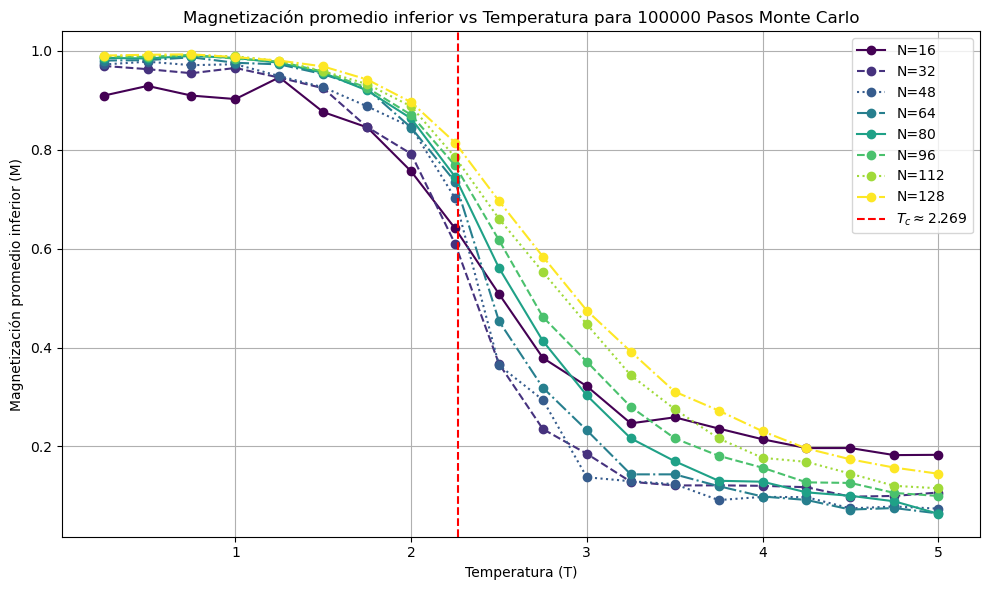

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

valores_N = [16, 32, 48, 64, 80, 96, 112, 128]
colores = plt.cm.viridis(np.linspace(0, 1, len(valores_N)))
estilos = ['-', '--', ':', '-.']

plt.figure(figsize=(10, 6))

for i, N in enumerate(valores_N):
    archivo = f'archivos/promedio_magnetizacioninferior{N}.txt'
    if os.path.exists(archivo):
        datos = np.loadtxt(archivo)
        T = datos[:, 1]
        M = datos[:, 0]
        plt.plot(T, M, linestyle=estilos[i % len(estilos)], color=colores[i], marker='o', label=f'N={N}')
    else:
        print(f'No se encontró {archivo}')

plt.axvline(2.269, color='red', linestyle='--', label=r'$T_c \approx 2.269$')
plt.title('Magnetización promedio inferior vs Temperatura para 100000 Pasos Monte Carlo')
plt.xlabel('Temperatura (T)')
plt.ylabel('Magnetización promedio inferior (M)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Se ve una caída brusca de la magnetización alrededor de nuestro valor $T_c = 2.269$. Esto indica una transición de fase de ferromagnético a paramagnético. También se observa que para mayores valores de *N* la magnetización es mayor, convergiendo a 1, lo cual es consistente cunado tomamos el límite termodinámico. Aunque se observa que a mayores *N*, la pendiente (por lo general) es más suave, no es tam abrupta como con valores de *N=32* o *N=48*, lo que difiere con la teoría termondinámica, ya que se debería de obtener una curva más abrupta a medida que se aumenta el valor de la *N*.

Para $T>3$ los valores de magnetizaicones promedio tienden rápidamente a 0, lo que indica un estado desordenado, que corresponde con un material paramagnético tal y como se ha dicho anteriormente.

En general, la solución analítica para el problema desscrito es 
$$
M(T) = B(T_c-T)^\beta
$$
donde *B* es una constante y $\beta =1/8$

Reordenando obtenemos un comportamiento logarítmico
$$
ln[M(T)] = \beta ln(T_c-T) + B
$$
De esta manera es posible calcular la temperatura crítica $T_c$. Para ver que esto ocurre con nuestro modelo, se realizó un ajuste logarítmico a nuestros datos de red *N = 32*.

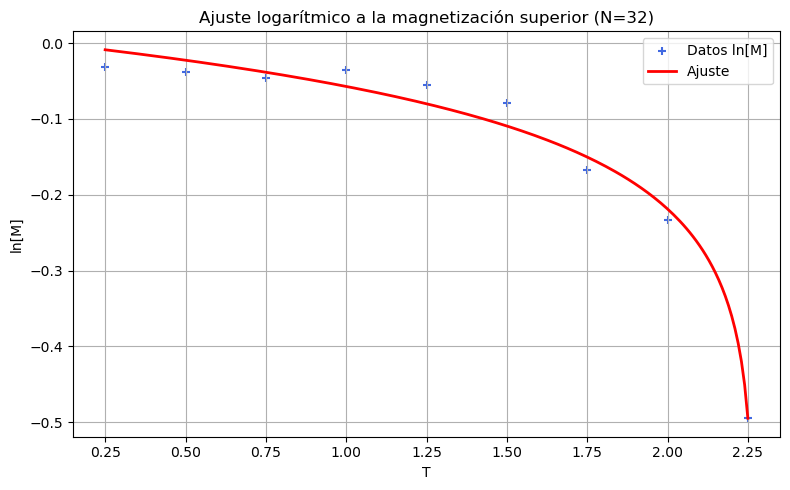

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Cargar datos
datos = np.loadtxt('promedio_magnetizacionsuperior32.txt')
M = datos[:, 0]
T = datos[:, 1]

Tc = 2.269

# Filtrar solo los datos con T < Tc
mask = T < Tc
T_fit = T[mask]
M_fit = M[mask]

def log_func(T, beta, B):
    return beta * np.log(Tc - T) + B

lnM = np.log(M_fit)
popt, pcov = curve_fit(log_func, T_fit, lnM)
beta_fit, B_fit = popt

# Graficar ln[M] vs T y el ajuste
plt.figure(figsize=(8,5))
plt.scatter(T_fit, lnM, color='royalblue', marker= '+', label='Datos ln[M]')
T_line = np.linspace(min(T_fit), max(T_fit), 200)
plt.plot(T_line, log_func(T_line, *popt), color='red', label='Ajuste', linewidth=2)
plt.xlabel('T')
plt.ylabel('ln[M]')
plt.title('Ajuste logarítmico a la magnetización superior (N=32)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Densidad promedio
Para calcular la densidad media por partícula en cada columna, se recorren todos los espines de una fila y se cuenta cuántos de ellos tienen el valor $(+1)$, a continuación se divide entre *N* (el número totales de espines en cada columna). La función que realiza esto es **densidad_fila**. 

En la siguiente imagen se muestra la gráfica obtenida para los distintos valores de *N*, eligiendo la fila $N/2$, ya que así se ignorarán todo lo posible las condiciones de contorno.

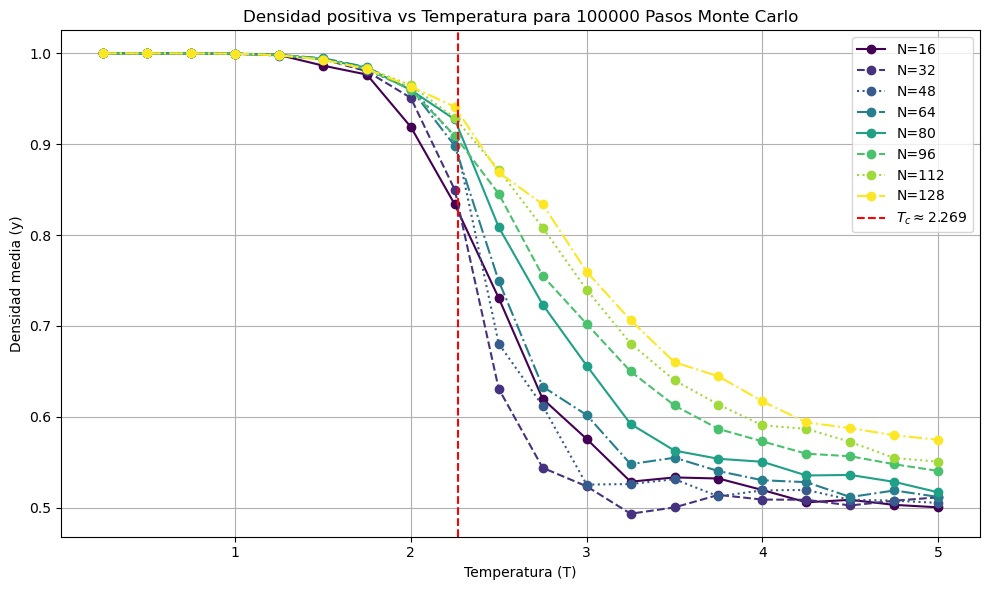

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

valores_N = [16, 32, 48, 64, 80, 96, 112, 128]
colores = plt.cm.viridis(np.linspace(0, 1, len(valores_N)))
estilos = ['-', '--', ':', '-.']

plt.figure(figsize=(10, 6))

for i, N in enumerate(valores_N):
    archivo = f'archivos/promedio_densidadnegativo{N}.txt'
    if os.path.exists(archivo):
        datos = np.loadtxt(archivo)
        T = datos[:, 1]
        M = datos[:, 0]
        plt.plot(T, M, linestyle=estilos[i % len(estilos)], color=colores[i], marker='o', label=f'N={N}')
    else:
        print(f'No se encontró {archivo}')

plt.axvline(2.269, color='red', linestyle='--', label=r'$T_c \approx 2.269$')
plt.title('Densidad positiva vs Temperatura para 100000 Pasos Monte Carlo')
plt.xlabel('Temperatura (T)')
plt.ylabel('Densidad media (y)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Para estas medidas se tomó una configuración inicial ordenada, por eso en todas ellas la densidad media es 1 al comienzo y, al acercarse a $T_c$, estos valores van disminuyendo hasta ser práctcamente $1/2$, indicando que poco a poco se van reordenando para llegar a tener la mitad de espines positivos y la otra mitad negativos en una sola columna. Esto prueba una distribución aleatoria de espines a altas temperaturas. 

Otro punto a destacar es que, a diferencia de lo que pasaba con la magnetización, estos valores son muy próximos independientemente del valor de *N*, aunque hay que destacar que al aumentar el tamaño de la red la densidad media de partículas converge de una manera más suave y lenta en comparación con los tamaños pequeños.

## 5. Energía media
Para el cálculo de la energía se usaron dos funciones distintas. La primera, **energia_local**, que suma las interacciones de cada espín con sus vecinos. La funcion **energia_total** se encarga de sumar la energía al principio y al final de cada paso Kawasaki. Se promeda cada 100 pasos Monte Carlo al igual que como se hacía en el cálculo de la magnetización para así, al final de la simulación, sumar todas las energías almacenadas y normalizando. Esta normalización se realiza dividiendo entre *$2N^2$* porque al calcular la energía total, cada espín realmente se está contando dos veces, así se evita el doble conteo.

In [4]:
import glob
import re
import os

# Función para extraer el tamaño de red N del nombre del archivo
def extraer_tamano(nombre):
    match = re.search(r'(\d+)\.txt$', nombre)
    return int(match.group(1)) if match else 0

# Buscar todos los archivos de energía en la carpeta 'archivos'
archivos_energia = glob.glob(os.path.join("archivos", "promedio_energia*.txt"))

# Procesar cada archivo
for archivo in archivos_energia:
    N = extraer_tamano(archivo)  # Extraer el tamaño de red N
    if N == 0:
        continue  # Ignorar archivos sin tamaño válido

    datos_normalizados = []
    with open(archivo, "r") as f:
        for linea in f:
            partes = linea.strip().split()
            if len(partes) == 2:
                energia, temp = map(float, partes)
                energia_normalizada = energia / (2 * N**2)
                datos_normalizados.append((energia_normalizada, temp))

    # Crear un nuevo archivo con los datos normalizados en la misma carpeta
    nuevo_nombre = archivo.replace(".txt", "_normalizado.txt")
    with open(nuevo_nombre, "w") as f_out:
        for energia_norm, temp in datos_normalizados:
            f_out.write(f"{energia_norm:.6e} {temp:.2f}\n")

print("Archivos normalizados creados.")

Archivos normalizados creados.


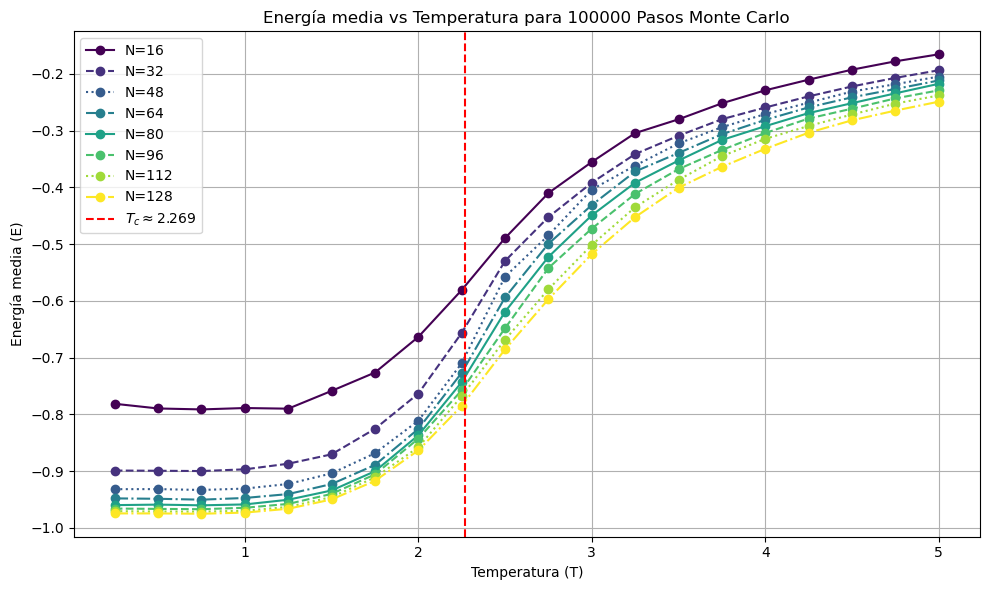

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

valores_N = [16, 32, 48, 64, 80, 96, 112, 128]
colores = plt.cm.viridis(np.linspace(0, 1, len(valores_N)))
estilos = ['-', '--', ':', '-.']

plt.figure(figsize=(10, 6))

for i, N in enumerate(valores_N):
    archivo = f'archivos/promedio_energia{N}_normalizado.txt'
    if os.path.exists(archivo):
        datos = np.loadtxt(archivo)
        T = datos[:, 1]
        M = datos[:, 0]
        plt.plot(T, M, linestyle=estilos[i % len(estilos)], color=colores[i], marker='o', label=f'N={N}')
    else:
        print(f'No se encontró {archivo}')

plt.axvline(2.269, color='red', linestyle='--', label=r'$T_c \approx 2.269$')
plt.title('Energía media vs Temperatura para 100000 Pasos Monte Carlo')
plt.xlabel('Temperatura (T)')
plt.ylabel('Energía media (E)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Se ha hecho uso de un código encargado de normalizar los datos ya que el programa en C no realizaba esta tarea, una vez normalizados se han graficado obteniendo lo mostrado encima. Como se comprueba, en general para todas las *N* la energía media es muy cercana a $E=-1", sobre todo para tamaños de red grandes. Quitando esta sutil diferencia, el comportamiento de la energía para cada red es exactamente el mismo, un poco antes de la temperatura crítica, la energía aumenta desde un estado desordenado (lo que corrobora aún más lo explicado en la sección (3), el estado de la red es ferromagnética) hasta tender a 0  de forma progresiva, teniendo un mayor cambio alrededor de $T_c$, es decir, en la transición de fase.


## 6. Calor específico
Se calcula mediante la fluctuación de la energía, al desarrollar, se llega a: 
$$
c_N = \frac{1}{N^2 T^2} \left( \langle E^2 \rangle - \langle E \rangle^2 \right)
$$


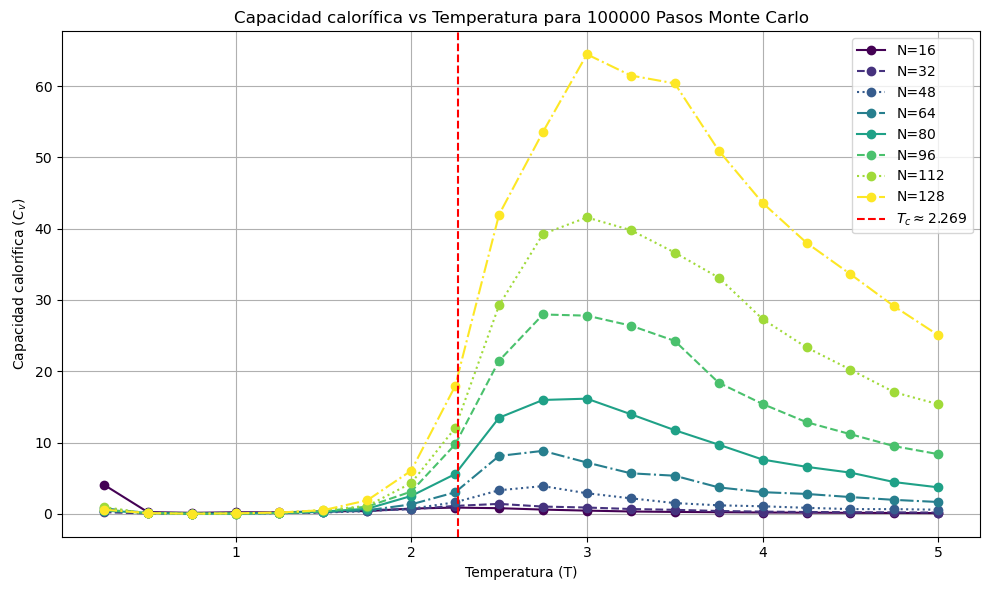

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

valores_N = [16, 32, 48, 64, 80, 96, 112, 128]
colores = plt.cm.viridis(np.linspace(0, 1, len(valores_N)))
estilos = ['-', '--', ':', '-.']

plt.figure(figsize=(10, 6))

for i, N in enumerate(valores_N):
    archivo = f'archivos/filecv{N}.txt'
    if os.path.exists(archivo):
        datos = np.loadtxt(archivo)
        T = datos[:, 1]
        M = datos[:, 0]
        plt.plot(T, M, linestyle=estilos[i % len(estilos)], color=colores[i], marker='o', label=f'N={N}')
    else:
        print(f'No se encontró {archivo}')

plt.axvline(2.269, color='red', linestyle='--', label=r'$T_c \approx 2.269$')
plt.title('Capacidad calorífica vs Temperatura para 100000 Pasos Monte Carlo')
plt.xlabel('Temperatura (T)')
plt.ylabel('Capacidad calorífica ($C_v$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

En las simulaciones realizadas, se ha observado que el pico del calor específico $ c_N $ aparece en torno a $ T \approx 3 $, un valor mayor al esperado teóricamente para el modelo de Ising bidimensional estándar, cuya temperatura crítica es $( T_c \approx 2.27 )$.

Este desplazamiento puede atribuirse principalmente a dos causas:

1. **Condiciones de contorno impuestas artificialmente**: En el modelo implementado, se fijan los espines de la primera y última fila de la red con valores constantes $(-1)$ y $(+1)$, respectivamente. Esta condición introduce un sesgo vertical en el sistema, favoreciendo la formación de dominios orientados verticalmente, lo que puede modificar la forma y posición del máximo del calor específico.

2. **Tiempo insuficiente de relajación**: Aunque se han empleado $(10^5)$ pasos Monte Carlo, este número puede ser insuficiente para alcanzar el equilibrio térmico en configuraciones cercanas a la temperatura crítica. Esto se acentúa especialmente en tamaños grandes de red (como $( N = 128 )$), donde el sistema necesita más tiempo para relajarse. La presencia de ruido y el desplazamiento del pico pueden estar reflejando esta falta de relajación completa.

Adicionalmente, debe tenerse en cuenta que el modelo simulado es la versión con dinámica de Kawasaki (conservación de la magnetización), y no el modelo de Ising estándar. Este cambio en la dinámica puede afectar la localización precisa del pico del calor específico, ya que la evolución del sistema está restringida a intercambios entre espines de signo opuesto.

En conjunto, estas observaciones sugieren que el modelo simulado reproduce cualitativamente el comportamiento esperado (presencia de un pico en $( c_N )$), pero cuantitativamente presenta un desplazamiento debido a las condiciones de contorno, la dinámica conservativa y la posible falta de relajación completa.

## 7. Susceptibilidad magnética
De la misma manera, la susceptibilidad magnética se ha hallado a partir de las fluctuaciones de la magnetización (en cada mitad). Siendo la expresión utilizada:

$$
c_N = \frac{1}{N^2 T} \left( \langle M^2 \rangle - \langle M \rangle^2 \right)
$$


<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
C:\Users\molin\AppData\Local\Temp\ipykernel_19552\1137837771.py:24: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Susceptibilidad magnética ($\chi$)')


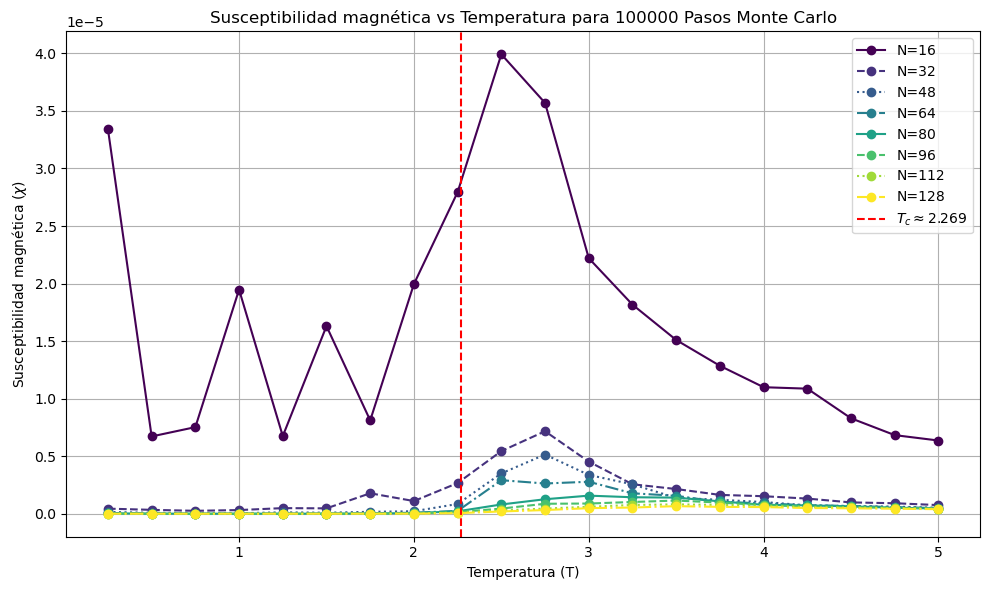

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

valores_N = [16, 32, 48, 64, 80, 96, 112, 128]
colores = plt.cm.viridis(np.linspace(0, 1, len(valores_N)))
estilos = ['-', '--', ':', '-.']

plt.figure(figsize=(10, 6))

for i, N in enumerate(valores_N):
    archivo = f'archivos/susceptibilidad{N}.txt'
    if os.path.exists(archivo):
        datos = np.loadtxt(archivo)
        T = datos[:, 1]
        M = datos[:, 0]
        plt.plot(T, M, linestyle=estilos[i % len(estilos)], color=colores[i], marker='o', label=f'N={N}')
    else:
        print(f'No se encontró {archivo}')

plt.axvline(2.269, color='red', linestyle='--', label=r'$T_c \approx 2.269$')
plt.title('Susceptibilidad magnética vs Temperatura para 100000 Pasos Monte Carlo')
plt.xlabel('Temperatura (T)')
plt.ylabel('Susceptibilidad magnética ($\chi$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

En este caso se observa un pico alrededor de $T=2.75$ (exceptuando la red de $N=16$, que fluctua debido muy posiblmente a que es una red muy pequeña).

Estos resultados muestran que realmente no hay ninguna transición de fase al aumentar la temperatura, lo cual es erróneo, ya que sí que lo hay en la temperatura crítica.

--
## Optimización

A continuación se mostrará una gráfica con el tiempo que tardó cada red *NxN* y así poder ver qué tipo de correlación tiene.

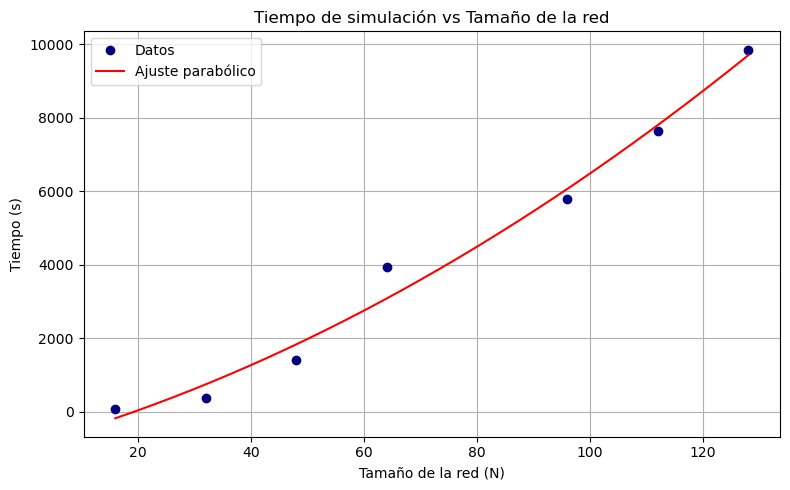

Coeficientes del ajuste parabólico: a=3.1793e-01, b=4.2522e+01, c=-9.4507e+02


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
datos = np.loadtxt('archivos/tiemposN.txt')
N = datos[:, 0]
tiempos = datos[:, 1]

# Ajuste parabólico: tiempo = a*N^2 + b*N + c
coef = np.polyfit(N, tiempos, 2)
ajuste = np.poly1d(coef)

# Graficar datos y ajuste
plt.figure(figsize=(8,5))
plt.plot(N, tiempos, marker='o', linestyle='', color='navy', label='Datos')
N_line = np.linspace(min(N), max(N), 200)
plt.plot(N_line, ajuste(N_line), color='red', label='Ajuste parabólico')
plt.xlabel('Tamaño de la red (N)')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo de simulación vs Tamaño de la red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Coeficientes del ajuste parabólico: a={coef[0]:.4e}, b={coef[1]:.4e}, c={coef[2]:.4e}")